# Recommenders

## Content-Based Filtering

### Cosine Similarity

In [1]:
import pandas as pd

fruit_nutrition = pd.read_csv('Data/fruit_nutrition.csv')
fruit_nutrition

,fruit_100g,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
0,Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
1,Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
2,Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
3,Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
4,Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
5,Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [2]:
nutrition = fruit_nutrition.set_index('fruit_100g')
nutrition.index.name = None
nutrition

,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [3]:
df = nutrition.iloc[:,5:]
df

,sugars_g,vitaminc_mg
Banana,12.20,8.7
Lemon,2.50,53.0
Lime,1.69,29.1
Mango,8.39,4.1
Peach,13.70,36.4
Pineapple,9.85,47.8


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
cosine_similarity(df.loc[['Mango', 'Banana']])[0][1]

0.9864305980007304

In [6]:
cosine_similarity(df.loc[['Mango', 'Banana']])

array([[1.       , 0.9864306],
       [0.9864306, 1.       ]])

In [7]:
# show each row of the array on one line
import numpy as np

# set linewidth to a large value to prevent wrapping
np.set_printoptions(linewidth=np.inf)

In [8]:
cosine_similarity(df)

array([[1.        , 0.61832414, 0.62683477, 0.9864306 , 0.83018982, 0.73298243],
       [0.61832414, 1.        , 0.99994086, 0.48090193, 0.95146351, 0.98784307],
       [0.62683477, 0.99994086, 1.        , 0.49040872, 0.95475426, 0.98947527],
       [0.9864306 , 0.48090193, 0.49040872, 1.        , 0.72739811, 0.61135407],
       [0.83018982, 0.95146351, 0.95475426, 0.72739811, 1.        , 0.98773952],
       [0.73298243, 0.98784307, 0.98947527, 0.61135407, 0.98773952, 1.        ]])

In [9]:
cosine_df = pd.DataFrame(cosine_similarity(df), index=df.index, columns=df.index)
cosine_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.618324,0.626835,0.986431,0.830190,0.732982
Lemon,0.618324,1.000000,0.999941,0.480902,0.951464,0.987843
Lime,0.626835,0.999941,1.000000,0.490409,0.954754,0.989475
Mango,0.986431,0.480902,0.490409,1.000000,0.727398,0.611354
Peach,0.830190,0.951464,0.954754,0.727398,1.000000,0.987740
Pineapple,0.732982,0.987843,0.989475,0.611354,0.987740,1.000000


In [10]:
cosine_similarity(nutrition)

array([[1.        , 0.77186848, 0.83412488, 0.92474189, 0.93676783, 0.87931265],
       [0.77186848, 1.        , 0.97739451, 0.87650678, 0.94133956, 0.9780653 ],
       [0.83412488, 0.97739451, 1.        , 0.95282112, 0.95471941, 0.96986632],
       [0.92474189, 0.87650678, 0.95282112, 1.        , 0.94580335, 0.91804609],
       [0.93676783, 0.94133956, 0.95471941, 0.94580335, 1.        , 0.98972148],
       [0.87931265, 0.9780653 , 0.96986632, 0.91804609, 0.98972148, 1.        ]])

In [11]:
cosine_all_df = pd.DataFrame(cosine_similarity(nutrition), index=nutrition.index, columns=nutrition.index)
cosine_all_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.771868,0.834125,0.924742,0.936768,0.879313
Lemon,0.771868,1.000000,0.977395,0.876507,0.941340,0.978065
Lime,0.834125,0.977395,1.000000,0.952821,0.954719,0.969866
Mango,0.924742,0.876507,0.952821,1.000000,0.945803,0.918046
Peach,0.936768,0.941340,0.954719,0.945803,1.000000,0.989721
Pineapple,0.879313,0.978065,0.969866,0.918046,0.989721,1.000000


### Content-Based Filtering Recommendations.

In [12]:
df

,sugars_g,vitaminc_mg
Banana,12.20,8.7
Lemon,2.50,53.0
Lime,1.69,29.1
Mango,8.39,4.1
Peach,13.70,36.4
Pineapple,9.85,47.8


In [13]:
cosine_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.618324,0.626835,0.986431,0.830190,0.732982
Lemon,0.618324,1.000000,0.999941,0.480902,0.951464,0.987843
Lime,0.626835,0.999941,1.000000,0.490409,0.954754,0.989475
Mango,0.986431,0.480902,0.490409,1.000000,0.727398,0.611354
Peach,0.830190,0.951464,0.954754,0.727398,1.000000,0.987740
Pineapple,0.732982,0.987843,0.989475,0.611354,0.987740,1.000000


In [16]:
cosine_df[['Mango']].sort_values(by='Mango', ascending=False)

,Mango
Mango,1.000000
Banana,0.986431
Peach,0.727398
Pineapple,0.611354
Lime,0.490409
Lemon,0.480902


In [17]:
cosine_all_df[['Mango']].sort_values(by='Mango', ascending=False)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


In [22]:
def recommend_fruits_based_on_liking(fruit_name, similarity_df):

    # Check if the input fruit is in the DataFrame
    if fruit_name not in df.index:
        return f"{fruit_name} is not found in the fruit list."
    
    return similarity_df[[fruit_name]].sort_values(by=fruit_name, ascending=False)

In [24]:
recommend_fruits_based_on_liking('Lime', cosine_df)

,Lime
Lime,1.000000
Lemon,0.999941
Pineapple,0.989475
Peach,0.954754
Banana,0.626835
Mango,0.490409


In [25]:
recommend_fruits_based_on_liking('Lime', cosine_all_df)

,Lime
Lime,1.000000
Lemon,0.977395
Pineapple,0.969866
Peach,0.954719
Mango,0.952821
Banana,0.834125


## Collaborative Filtering

# User-Item Matrix

In [29]:
fruit_ratings = pd.read_csv('Data/fruit_ratings.csv')
fruit_ratings

,User,Fruit,Rating
0,user0,Lemon,4.3
1,user1,Lemon,4.6
2,user2,Lemon,4.2
3,user3,Lemon,4.4
4,user4,Lemon,4.1
...,...,...,...
174,user25,Mango,4.9
175,user26,Mango,4.4
176,user27,Mango,4.3
177,user28,Mango,4.2


In [35]:
X = fruit_ratings.pivot(index='User', columns='Fruit', values='Rating')
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [44]:
X[X.isna().any(axis=1)] # Found a NaN

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user19,3.5,4.8,NaN,3.1,3.4,3.2


In [48]:
fruit_ratings.describe()

,Rating
count,179.000000
mean,3.147486
std,1.465610
min,1.000000
25%,1.650000
50%,3.400000
75%,4.600000
max,5.000000


In [52]:
X.Lime.describe()

count    29.000000
mean      2.937931
std       1.636724
min       1.000000
25%       1.200000
50%       3.100000
75%       4.600000
max       4.900000
Name: Lime, dtype: float64

In [55]:
X = fruit_ratings.pivot(index='User', columns='Fruit', values='Rating').fillna(3)
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [62]:
X.shape

(30, 6)

# Singular Value Decomposition

## Truncated SVD (Singular Value Decomposition)

In [56]:
from sklearn.decomposition import TruncatedSVD

In [57]:
svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [63]:
# U (users x latent features)
U = svd.transform(X)
U_df = pd.DataFrame(U)
U_df.head()

,0,1
0,7.473496,-4.062791
1,7.491190,-3.972463
2,8.330967,-0.158395
3,7.725274,-0.926172
4,8.366775,1.396251


In [72]:
 # svd.fit_transform(X) # Alternative to do 2 steps in one line of code
U_df.describe()

,0,1
count,30.000000,30.000000
mean,7.727409,-0.043018
std,0.378632,3.278015
min,6.936136,-4.141252
25%,7.505244,-3.951632
50%,7.665445,-0.268574
75%,7.890903,3.641499
max,8.588348,3.920010


In [64]:
U_df.shape

(30, 2)

In [67]:
# sigma
sigma = svd.singular_values_
sigma

array([42.3738503, 17.6542247])

In [71]:
# VT (latent features x fruits)
VT = svd.components_
VT_df = pd.DataFrame(VT, columns=X.columns)
VT_df

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,0.422823,0.376398,0.378344,0.381959,0.44026,0.443486
1,0.468373,-0.419367,-0.467655,0.426644,0.28962,-0.346628


In [70]:
VT_df.shape

(2, 6)

### Choosing the Number of Components

In [73]:
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [74]:
X.shape

(30, 6)

In [75]:
# users x latent features 
U.shape

(30, 2)

In [76]:
svd.explained_variance_ratio_

array([0.01114043, 0.83500665])

In [77]:
sum(svd.explained_variance_ratio_)

0.8461470788660221

In [81]:
svd6 = TruncatedSVD(n_components=6) # 6 columns in original data set X
U6 = svd6.fit_transform(X)

In [83]:
U6_df = pd.DataFrame(U6)
U6_df.head()

,0,1,2,3,4,5
0,7.473496,-4.062791,-0.069101,-0.252455,-0.363006,0.017474
1,7.491190,-3.972463,-0.069951,-0.213452,0.200745,-0.029323
2,8.330967,-0.158395,1.456494,1.829248,0.024443,0.363001
3,7.725274,-0.926172,-1.780361,0.514856,0.997471,-0.492574
4,8.366775,1.396251,2.265663,-0.059205,0.303751,-0.829798


In [84]:
U6.shape

(30, 6)

In [86]:
svd6.explained_variance_ratio_.round(2)

array([0.01, 0.84, 0.08, 0.05, 0.01, 0.01])

In [90]:
import numpy as np

np.cumsum(svd6.explained_variance_ratio_).round(2)

array([0.01, 0.85, 0.93, 0.98, 0.99, 1.  ])

In [91]:
# prep the data for line plot
cum_evr6 = list(zip(range(1, U6.shape[1] + 1), np.cumsum(svd6.explained_variance_ratio_))) # hits 80% at 2 components
cum_evr6

[(1, 0.011140426986469559),
 (2, 0.8461470788660219),
 (3, 0.9263972581039877),
 (4, 0.9759333027137881),
 (5, 0.990385175990244),
 (6, 0.9999999999999993)]

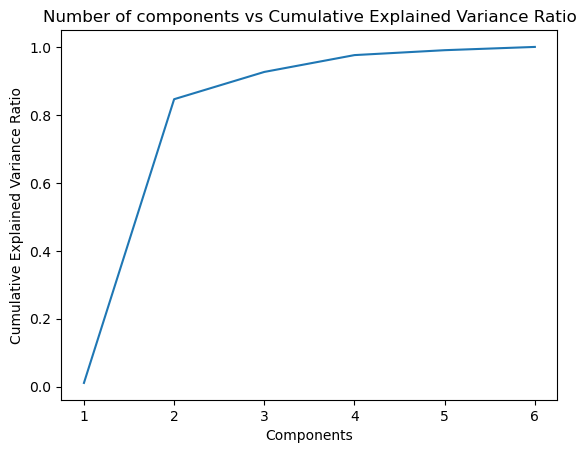

In [92]:
# 80%+ of the variance is captured at 2 components --> choose a 2 component model
cum_evr6_df = pd.DataFrame(cum_evr6).set_index(0)
cum_evr6_df.plot(
    title= 'Number of components vs Cumulative Explained Variance Ratio',
    xlabel= 'Components',
    ylabel= 'Cumulative Explained Variance Ratio',
    legend= False
);